In [1]:
import numpy as np 
import pandas as pd 


In [2]:
df = pd.read_csv('Churn_Modelling.csv')
#df

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
print(df.shape)

(10000, 14)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [13]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [14]:
X = df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [15]:
X_train.shape


(8000, 11)

In [16]:
from sklearn.preprocessing import StandardScaler
scal = StandardScaler()
X_train_scale=scal.fit_transform(X_train)
X_test_scale=scal.fit_transform(X_test)

In [17]:
X_train_scale

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [18]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [19]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [22]:
history=model.fit(X_train_scale,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7577 - loss: 0.5552 - val_accuracy: 0.7975 - val_loss: 0.4607
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7975 - loss: 0.4537 - val_accuracy: 0.8175 - val_loss: 0.4259
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - accuracy: 0.8185 - loss: 0.4254 - val_accuracy: 0.8238 - val_loss: 0.4146
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - accuracy: 0.8207 - loss: 0.4185 - val_accuracy: 0.8231 - val_loss: 0.4075
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8296 - loss: 0.3960 - val_accuracy: 0.8225 - val_loss: 0.4016
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 0.8287 - loss: 0.3975 - val_accuracy: 0.8225 - val_loss: 0.3951
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - accuracy: 0.8275 - loss: 0.3942 - val_accuracy: 0.8200 - val_loss: 0.3898
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.8381 - loss: 0.3775 

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8699 - loss: 0.3251 - val_accuracy: 0.8487 - val_loss: 0.3474
Epoch 51/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8641 - loss: 0.3269 - val_accuracy: 0.8556 - val_loss: 0.3443
Epoch 52/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - accuracy: 0.8559 - loss: 0.3434 - val_accuracy: 0.8469 - val_loss: 0.3464
Epoch 53/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - accuracy: 0.8671 - loss: 0.3179 - val_accuracy: 0.8494 - val_loss: 0.3474
Epoch 54/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - accuracy: 0.8621 - loss: 0.3260 - val_accuracy: 0.8525 - val_loss: 0.3464
Epoch 55/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8723 - loss: 0.3120 - val_accuracy: 0.8512 - val_loss: 0.3454
Epoch 56/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8675 - loss: 0.3178 - val_accuracy: 0.8481 - val_loss: 0.3460
Epoch 57/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8611 - loss: 0.3299 - val_acc

Epoch 100/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8639 - loss: 0.3243 - val_accuracy: 0.8556 - val_loss: 0.3465


In [23]:
model.layers[0].get_weights()

[array([[ 0.0299785 , -0.08054576, -0.09215835, -0.00911586, -0.11045274,
         -0.5863944 ,  0.06624439, -0.21823768, -0.10361903,  0.17074613,
         -0.23774546],
        [ 0.16387881, -0.78386647, -0.52792716,  0.9555827 ,  0.12621184,
         -1.1263114 , -0.4503329 , -0.2742399 ,  0.46992558, -0.24877258,
          0.9747462 ],
        [ 0.12781885,  0.21753496, -0.16564927,  0.3455757 , -0.07909048,
          0.4032309 , -0.12883537, -0.15220852, -0.09989025,  0.15768725,
         -0.26562428],
        [-0.15064244, -0.05771001, -0.28242278,  0.14252414,  0.6966643 ,
         -0.09429775, -0.08585746, -0.31372115, -0.7481392 , -0.31701627,
         -0.36214134],
        [ 1.6744541 ,  0.15056701, -0.2867833 , -0.14714502,  0.67073023,
          0.12259521, -0.02024382,  0.25960323,  0.11519219, -1.303637  ,
         -0.65252835],
        [-0.1505422 ,  0.27053893, -0.54399997,  0.04948012,  0.04970913,
         -0.5522844 , -0.1649942 , -0.18102972, -0.21402314, -0.1556863

In [24]:
model.layers[1].get_weights()

[array([[-0.92735434, -0.40979922,  0.03246032, -1.4083827 , -0.09877229,
          0.8181905 ,  0.256791  , -0.23514299, -0.3766781 , -0.42640832,
         -0.194188  ],
        [ 0.48985395,  0.575984  ,  0.38410333,  0.24072522,  0.47696698,
         -0.62512577, -0.17436764,  0.36963946,  0.70384634, -0.21973546,
         -0.53190553],
        [ 0.13908327,  0.1276645 ,  0.3291533 ,  0.23850146,  0.3933233 ,
         -0.5513594 , -0.23083198, -0.11571913, -0.50322425,  0.32072595,
          0.15019847],
        [ 0.01273317,  0.4382878 , -0.6558495 , -0.32303897,  0.08128446,
          0.05855736,  0.53386   ,  0.79866624,  0.6945494 , -0.22050115,
         -0.5411507 ],
        [ 0.04444584,  0.27348286, -0.4401773 ,  0.44421053, -0.24315429,
          0.7019648 ,  0.32884976, -0.77155715, -0.15278697, -0.14895515,
         -0.0490082 ],
        [-0.23904675, -1.074597  , -0.6048861 ,  0.03263356, -0.362777  ,
         -0.30611032, -0.8272435 ,  0.26533064, -0.07718914,  0.3103940

In [25]:
model.layers[2].get_weights()

[array([[ 0.40691677],
        [-0.91458464],
        [-1.0188208 ],
        [ 0.85257816],
        [-0.519948  ],
        [ 0.919598  ],
        [ 1.0647243 ],
        [-0.3872926 ],
        [-0.97967374],
        [-0.6821001 ],
        [-0.602201  ]], dtype=float32),
 array([-0.05985679], dtype=float32)]

In [97]:
y_log = model.predict(X_test_scale)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [98]:
y_pred = np.where(y_log>0.5,1,0) 

In [99]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8655

In [100]:
import matplotlib.pyplot as plt


In [101]:
history.history

{'accuracy': [0.7881249785423279,
  0.7973437309265137,
  0.8010937571525574,
  0.815625011920929,
  0.82421875,
  0.8284375071525574,
  0.8343750238418579,
  0.840624988079071,
  0.8453124761581421,
  0.8504687547683716,
  0.8534374833106995,
  0.8579687476158142,
  0.8600000143051147,
  0.8592187762260437,
  0.8587499856948853,
  0.8615624904632568,
  0.8615624904632568,
  0.8607812523841858,
  0.8631250262260437,
  0.8612499833106995,
  0.862500011920929,
  0.862500011920929,
  0.8618749976158142,
  0.86328125,
  0.8617187738418579,
  0.86328125,
  0.8637499809265137,
  0.8626562356948853,
  0.8642187714576721,
  0.8653125166893005,
  0.8606250286102295,
  0.8645312786102295,
  0.8628125190734863,
  0.8635937571525574,
  0.864062488079071,
  0.8635937571525574,
  0.8662499785423279,
  0.864062488079071,
  0.8629687428474426,
  0.8639062643051147,
  0.8631250262260437,
  0.8654687404632568,
  0.8645312786102295,
  0.8642187714576721,
  0.8645312786102295,
  0.8648437261581421,
  0.86

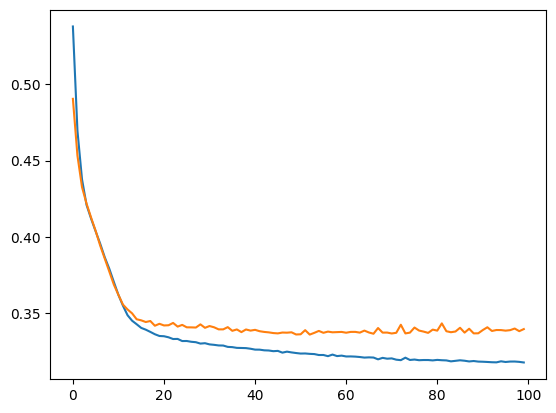

In [102]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

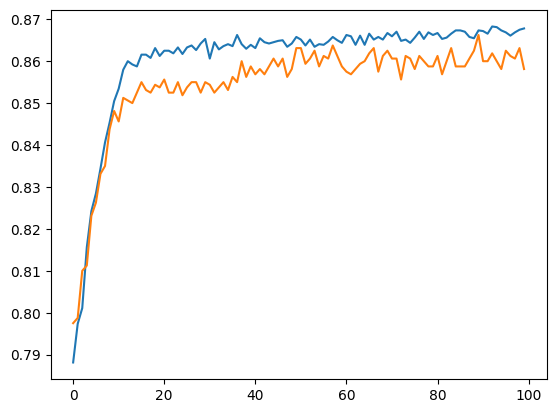

In [103]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])